# 0. Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Import Dataset

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
(X_train.shape, y_train.shape)

((50000, 32, 32, 3), (50000, 1))

In [17]:
(X_test.shape, y_test.shape)

((10000, 32, 32, 3), (10000, 1))

# 2. Visualize Data

In [18]:
classes = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

In [22]:
y_train[0].item()

6

frogs


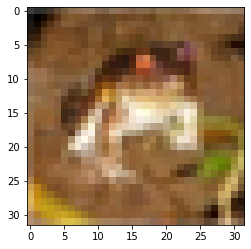

In [23]:
plt.imshow(X_train[0])
print(classes[y_train[0].item()])
plt.show()

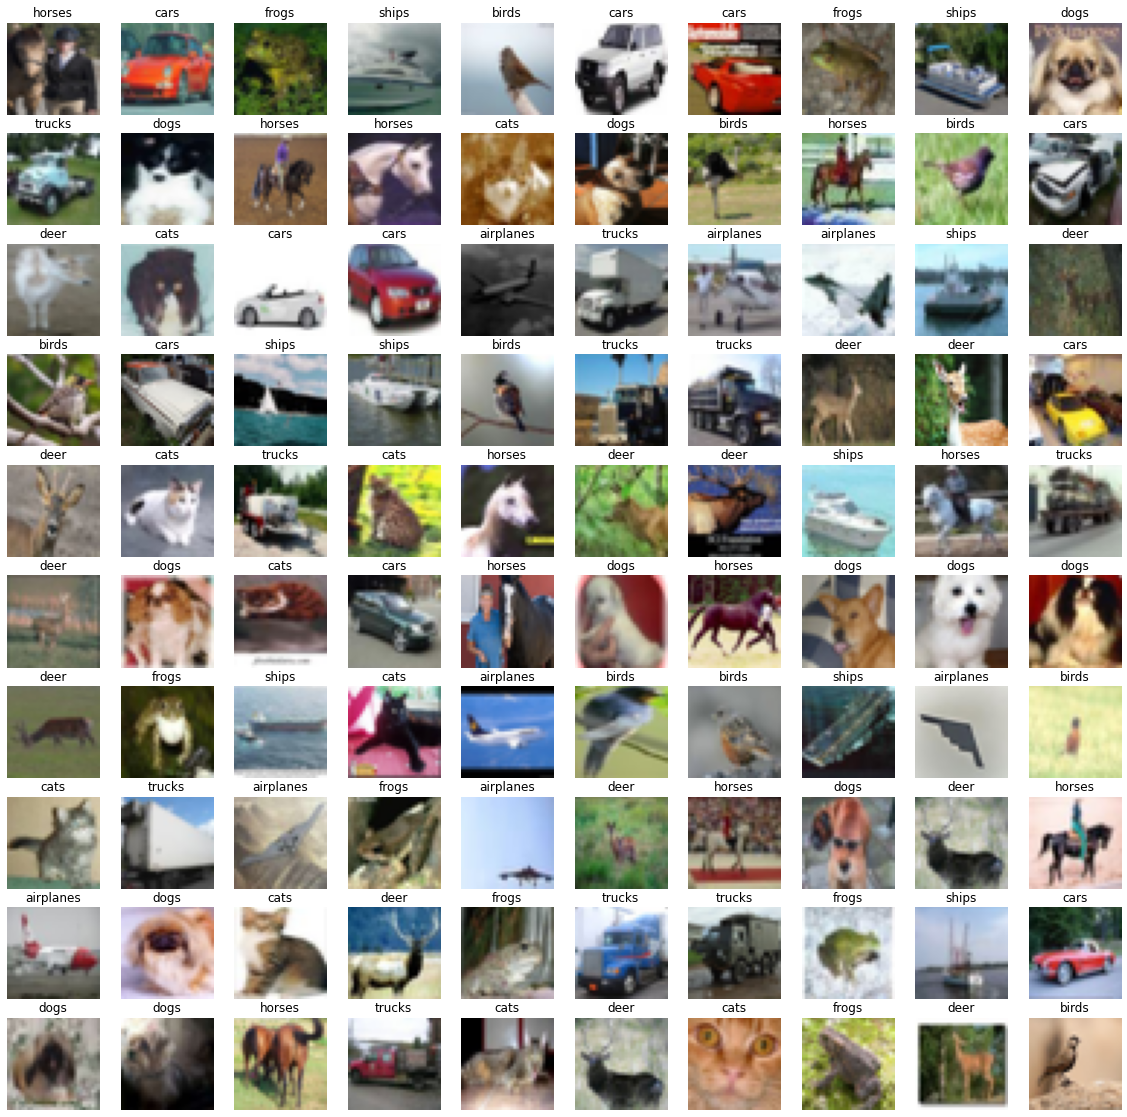

In [24]:
fig, axes = plt.subplots(10,10, figsize =(20,20))
axes = axes.ravel()

for i in np.arange(0,10*10):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(classes[y_train[index].item()])
    axes[i].axis('off')

# 3. Data Preparation

In [27]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [30]:
number_cat = 10

y_train = to_categorical(y_train, number_cat)
y_test = to_categorical(y_test, number_cat)

In [32]:
X_train = X_train/255
X_test = X_test/255

In [36]:
input_shape = X_train.shape[1:]

# 4. Model Training 

In [38]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))

In [39]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [42]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0015), metrics=['accuracy'])

In [43]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1,shuffle=True)

Epoch 1/10
1407/1407 [==============================] - 56s 14ms/step - loss: 1.9224 - accuracy: 0.2785 - val_loss: 1.4776 - val_accuracy: 0.4764
Epoch 2/10
1407/1407 [==============================] - 25s 18ms/step - loss: 1.3463 - accuracy: 0.5097 - val_loss: 1.2205 - val_accuracy: 0.5668
Epoch 3/10
1407/1407 [==============================] - 26s 19ms/step - loss: 1.1807 - accuracy: 0.5752 - val_loss: 1.0306 - val_accuracy: 0.6312
Epoch 4/10
1407/1407 [==============================] - 31s 22ms/step - loss: 1.0438 - accuracy: 0.6324 - val_loss: 0.9274 - val_accuracy: 0.6726
Epoch 5/10
1407/1407 [==============================] - 31s 22ms/step - loss: 0.9429 - accuracy: 0.6674 - val_loss: 0.8849 - val_accuracy: 0.6910
Epoch 6/10
1407/1407 [==============================] - 39s 27ms/step - loss: 0.8827 - accuracy: 0.6912 - val_loss: 0.8392 - val_accuracy: 0.7102
Epoch 7/10
1407/1407 [==============================] - 58s 41ms/step - loss: 0.8210 - accuracy: 0.7089 - val_loss: 0.7971 -

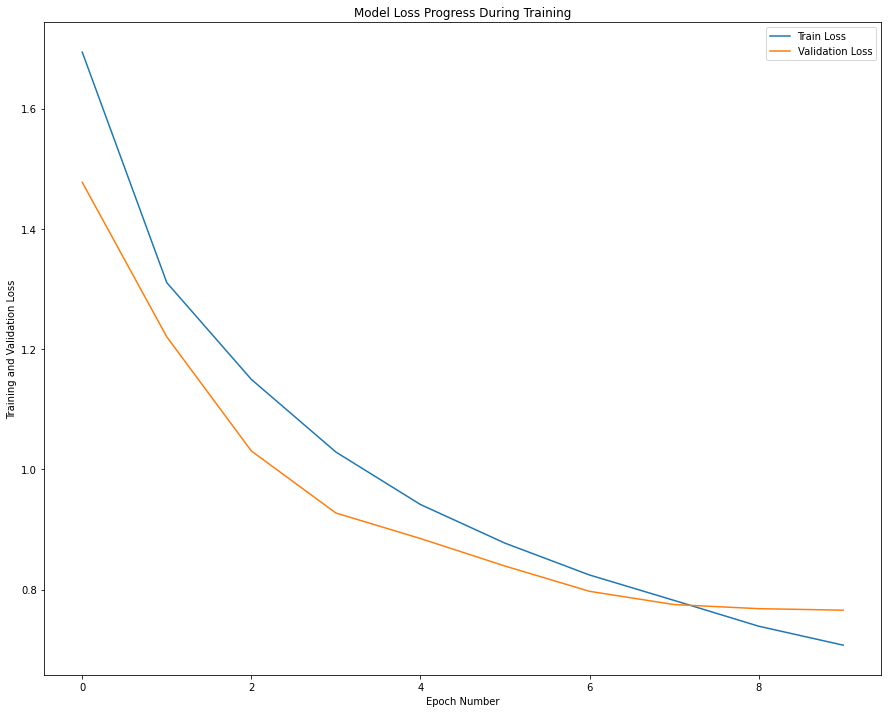

In [45]:
plt.figure(figsize = (15,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Loss')
plt.show()

# 5. Model Evaluation

In [46]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8255 - accuracy: 0.7200


[0.8254721760749817, 0.7200000286102295]

In [62]:
predicted_classes = cnn_model.predict_classes(X_test)

c:\Users\tolga\Anaconda3\envs\tf_gpu_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

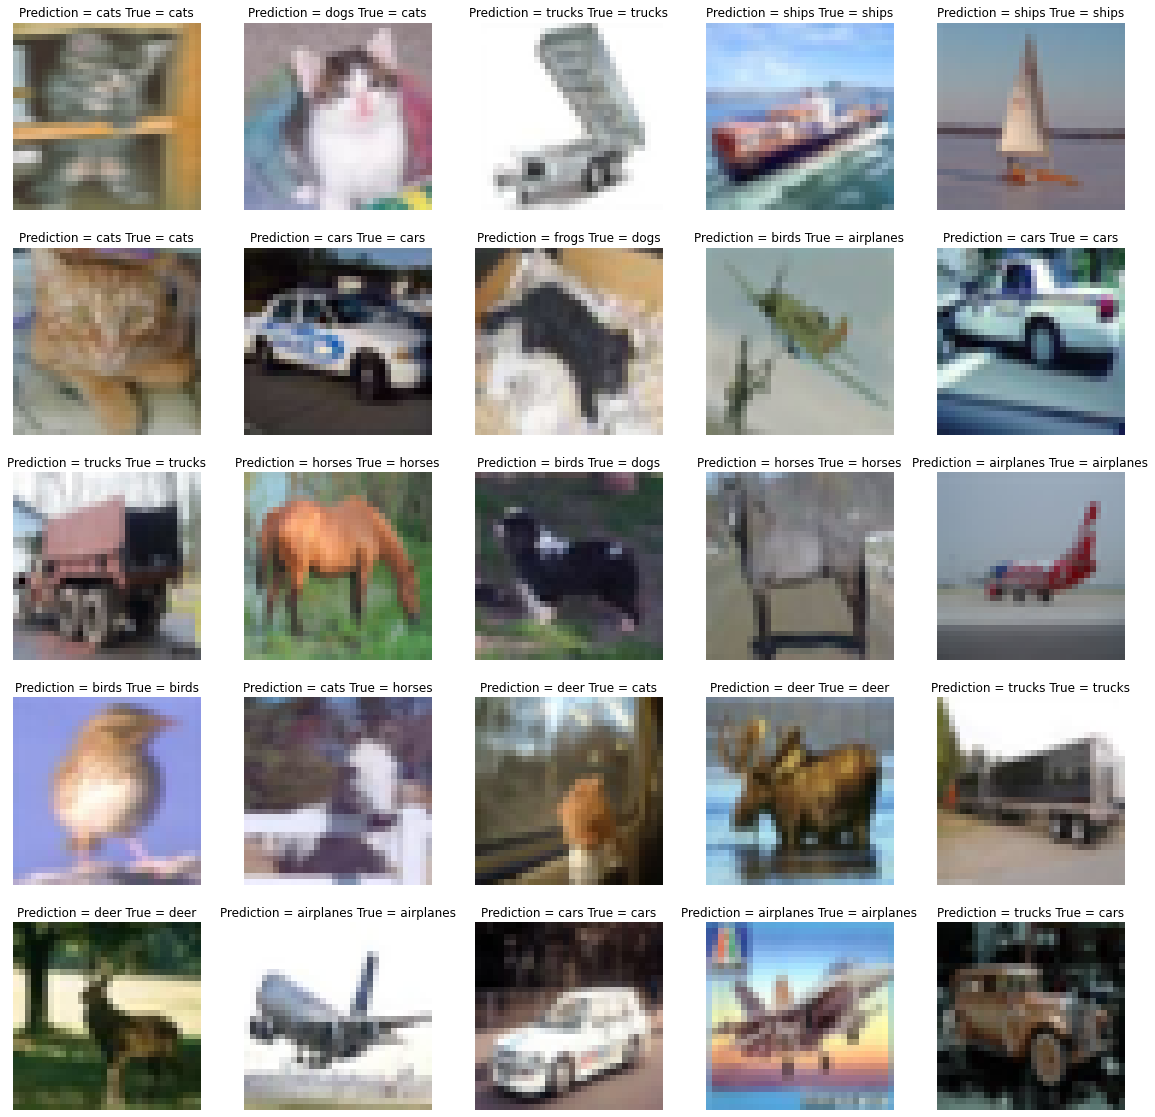

In [69]:
fig, axes = plt.subplots(5,5, figsize =(20,20))
axes = axes.ravel()

for i in np.arange(0,5*5):
    index = np.random.randint(0, len(X_test))
    axes[i].imshow(X_test[index])
    axes[i].set_title(f'Prediction = {classes[predicted_classes[index]]} True = {classes[np.argmax(y_test[index])]}')
    axes[i].axis('off')

# 6. Save the Model

In [70]:
cnn_model.save('tensorflow_cifar10_model.h5')

# 7. Data Augmentation

In [80]:
n = 8 
X_train_sample = X_train[:n]

In [81]:
# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))
dataget_train.fit(X_train_sample)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

number_cat = 10

y_train = to_categorical(y_train, number_cat)
y_test = to_categorical(y_test, number_cat)

X_train = X_train/255
X_test = X_test/255

In [5]:
datagen= ImageDataGenerator(rotation_range=90,
                            width_shift_range=0.1,
                            horizontal_flip = True,
                            vertical_flip = True)

In [6]:
datagen.fit(X_train)

In [10]:
input_shape = X_train.shape[1:]

In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape = input_shape))
cnn_model.add(Conv2D(32, (3,3), activation='relu'))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPool2D((2,2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))

In [12]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [15]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs = 10)

c:\Users\tolga\Anaconda3\envs\tf_gpu_env\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1563/1563 [==============================] - 59s 21ms/step - loss: 2.0387 - accuracy: 0.2284
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7667 - accuracy: 0.3509
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6464 - accuracy: 0.4029
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5661 - accuracy: 0.43453s - loss: 1.5667 - accura
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5095 - accuracy: 0.4568
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.4643 - accuracy: 0.4772
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4145 - accuracy: 0.4961
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3852 - accuracy: 0.5047
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3529 - accuracy: 0.5149
Epoch 10/10
1563/1563 [===============